In [1]:
# %matplotlib notebook
import NN_Module as nnm
import torch
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import math
import time
import pandas as pd
from pandas import read_csv

In [2]:
# Functions

# Target function to approximate
def target_func(input):
    """
    This is the fucntion the network will try to approximate.

    Inputs: input (Pytorch tensor)

    Outputs: output (Pytorch tensor)
    """
    return input[0]**2 + input[1]

In [3]:
# Notebook

# Hyperparameters
N = 2
train_size = 10000
test_size = 1000
hidden_nodes = 100
hidden_layers = 1
batch_size = 100
n_epochs = 500

In [4]:
# Create a list of sets of N random numbers, the training set
inputs = (10 * torch.rand((train_size,N),dtype=torch.float32) - 5).cuda()
outputs = torch.zeros((train_size, 1)).cuda()
for i in range(train_size):
    outputs[i] = torch.tensor([target_func(inputs[i])])

In [5]:
# create a test set
test_inputs = (10 * torch.rand((test_size,N),dtype=torch.float32) - 5).cuda() # Uniform
# test_inputs = torch.randn((test_size,N),dtype=torch.float32).cuda() # Normal
test_outputs = torch.zeros((test_size, 1)).cuda()
for i in range(test_size):
    test_outputs[i] = torch.tensor([target_func(test_inputs[i])])

In [20]:
# Data sets
graph_data = nnm.new_graph_data(test_size, n_epochs)
analysis_data = nnm.new_analysis_data() # Stores data of hyperparameters vs. performance

In [7]:
# Create a model
model = nnm.create_model(inputs, outputs, hidden_nodes, hidden_layers)

In [8]:
# Train the model
graph_data = nnm.train_network(model, hidden_nodes, hidden_layers, inputs, outputs, test_inputs, test_outputs, graph_data, analysis_data, batch_size, n_epochs)

=>Starting 1/500 epochs.
=>Starting 11/500 epochs.
=>Starting 21/500 epochs.
=>Starting 31/500 epochs.
=>Starting 41/500 epochs.
=>Starting 51/500 epochs.
=>Starting 61/500 epochs.
=>Starting 71/500 epochs.
=>Starting 81/500 epochs.
=>Starting 91/500 epochs.
=>Starting 101/500 epochs.
=>Starting 111/500 epochs.
=>Starting 121/500 epochs.
=>Starting 131/500 epochs.
=>Starting 141/500 epochs.
=>Starting 151/500 epochs.
=>Starting 161/500 epochs.
=>Starting 171/500 epochs.
=>Starting 181/500 epochs.
=>Starting 191/500 epochs.
=>Starting 201/500 epochs.
=>Starting 211/500 epochs.
=>Starting 221/500 epochs.
=>Starting 231/500 epochs.
=>Starting 241/500 epochs.
=>Starting 251/500 epochs.
=>Starting 261/500 epochs.
=>Starting 271/500 epochs.
=>Starting 281/500 epochs.
=>Starting 291/500 epochs.
=>Starting 301/500 epochs.
=>Starting 311/500 epochs.
=>Starting 321/500 epochs.
=>Starting 331/500 epochs.
=>Starting 341/500 epochs.
=>Starting 351/500 epochs.
=>Starting 361/500 epochs.
=>Starting 3

{'fig_loss': <Figure size 432x288 with 1 Axes>,
 'ax_loss': <matplotlib.axes._subplots.AxesSubplot at 0x2ad5e243fbe0>,
 'fig_accu': <Figure size 432x288 with 1 Axes>,
 'ax_accu': <matplotlib.axes._subplots.AxesSubplot at 0x2ad5ea5c52b0>,
 'fig_accu_out': <Figure size 432x288 with 1 Axes>,
 'ax_accu_out': <matplotlib.axes._subplots.AxesSubplot at 0x2ad5ea5f7978>,
 'fig_out_residual': <Figure size 432x288 with 1 Axes>,
 'ax_out_residual': <matplotlib.axes._subplots.AxesSubplot at 0x2ad5ea638080>,
 'fig_2D_residual': <Figure size 432x288 with 1 Axes>,
 'ax_2D_residual': <matplotlib.axes._subplots.Axes3DSubplot at 0x2ad5ea66b2b0>,
 'fig_histograms': <Figure size 432x288 with 2 Axes>,
 'ax_weights': <matplotlib.axes._subplots.AxesSubplot at 0x2ad5ea6ae7f0>,
 'ax_biases': <matplotlib.axes._subplots.AxesSubplot at 0x2ad5ea6e69e8>}

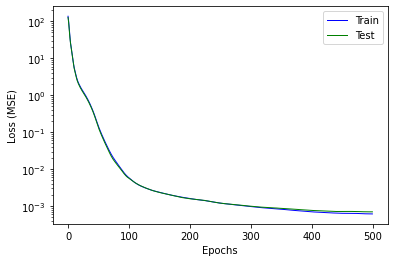

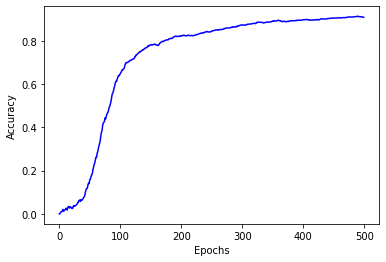

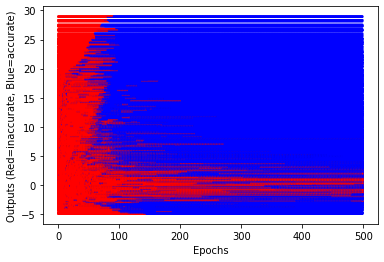

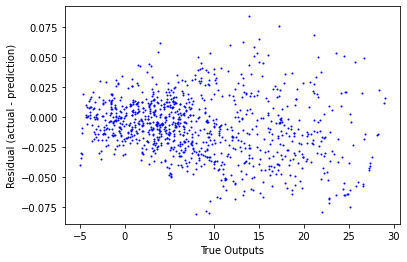

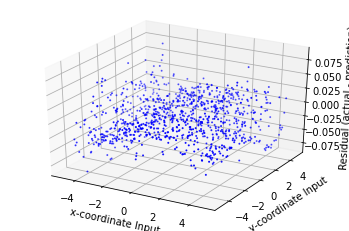

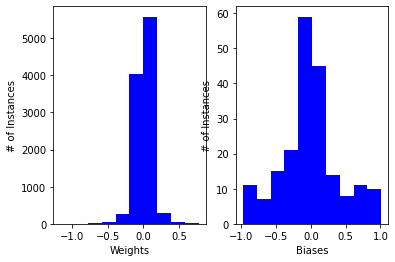

In [9]:
# Graphing
graphs = nnm.new_graphs()
nnm.graphing(graphs, graph_data)

In [11]:
# Show graphs
nnm.show_graphs(graphs)

In [12]:
# Save graphs
graphs['fig_loss'].savefig('loss.pdf')
graphs['fig_accu'].savefig('accu.pdf')
graphs['fig_accu_out'].savefig('accu_out.pdf')
graphs['fig_out_residual'].savefig('out_residual.pdf')
graphs['fig_2D_residual'].savefig('2D_residual.pdf')
graphs['fig_histograms'].savefig('histograms.pdf')

In [21]:
# Analysis
param_list = [[100, 1, 101]] # [nodes, layers, epochs]
for i in param_list:
    model = nnm.create_model(inputs, outputs, i[0], i[1])
    nnm.train_network(model, i[0], i[1], inputs, outputs, test_inputs, test_outputs, graph_data, analysis_data, batch_size, i[2], False)

Training done!


In [22]:
# Send data to be displayed
df = pd.DataFrame(data=analysis_data)

In [23]:
# Display analysis data
### Make graphs
print(df)

   nodes  layers  epochs       time  accuracy
0    100       1      50   8.041937     0.198
1    100       1     100  15.981995     0.747


In [17]:
# Uploads existing data and adds it to working dataset
# file_upload = read_csv("NN_Test_Data_1.csv")
# print(file_upload)
# df = df.append(file_upload)

In [24]:
# Saves run data as csv file
df.to_csv("NN_Test_Data_1.csv", index=False)